# Task 1: YouTube Streamer Analysis

Description: This dataset contains valuable
information about the top YouTube streamers,
including their ranking, categories, subscribers,
country, visits, likes, comments, and more.

# Import necessary libraries

In [12]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set seaborn style for plots
sns.set_style(style="darkgrid")

# Import csv file

In [2]:
data = pd.read_csv('Task 1 YouTube Streamer Analysis/youtubers_df.csv')
data.columns = data.columns.str.lower()

# Quick glance at the data
- exploring the dataset to understand its structure and identify key variables.
- Checking for missing data and outliers.

In [3]:
data.head()

,rank,username,categories,suscribers,country,visits,likes,comments,links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        1000 non-null   int64  
 1   username    1000 non-null   object 
 2   categories  694 non-null    object 
 3   suscribers  1000 non-null   float64
 4   country     1000 non-null   object 
 5   visits      1000 non-null   float64
 6   likes       1000 non-null   float64
 7   comments    1000 non-null   float64
 8   links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
print(data.isnull().sum())

rank            0
username        0
categories    306
suscribers      0
country         0
visits          0
likes           0
comments        0
links           0
dtype: int64


**Remarks:**
- It appears that the **Categories** column has 306 missing values, while the other columns do not have any missing values.
- We wil replace the missing values with with the most frequent category in our dataset

In [6]:
most_frequent_category = data['categories'].mode()[0]
data['categories'].fillna(most_frequent_category, inplace=True)

In [7]:
# Check for missing values 
print(data.isnull().sum())

rank          0
username      0
categories    0
suscribers    0
country       0
visits        0
likes         0
comments      0
links         0
dtype: int64


In [8]:
data.describe()

,rank,suscribers,visits,likes,comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


**Remarks:**
- The `df.describe()` function provides summary statistics for only the numeric variables in the dataset.
- The summary statistics provide insights into the distribution of key variables among the top YouTube streamers.

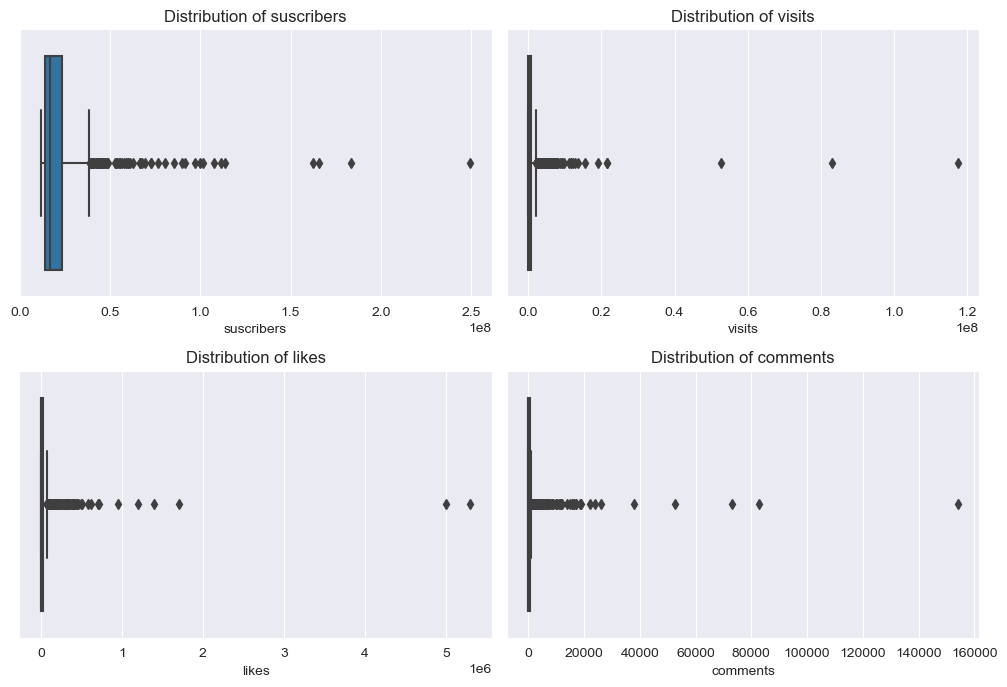

In [13]:
# numerical data

data_cat = data[['suscribers','visits','likes','comments']]

# set figsize
plt.figure(figsize=(10,10))

# loop through column names and plot distributions
for i, col in enumerate(data_cat.columns):

  # set subplot
  plt.subplot(3,2,i+1)

  # seaborn boxplot
  sns.boxplot(data=data_cat, x=col)
  plt.title(f'Distribution of {col}')

# minimize risk of subplots overlapping
plt.tight_layout()

# show final plot after subplots finished generating
plt.show() 

C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mzing\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

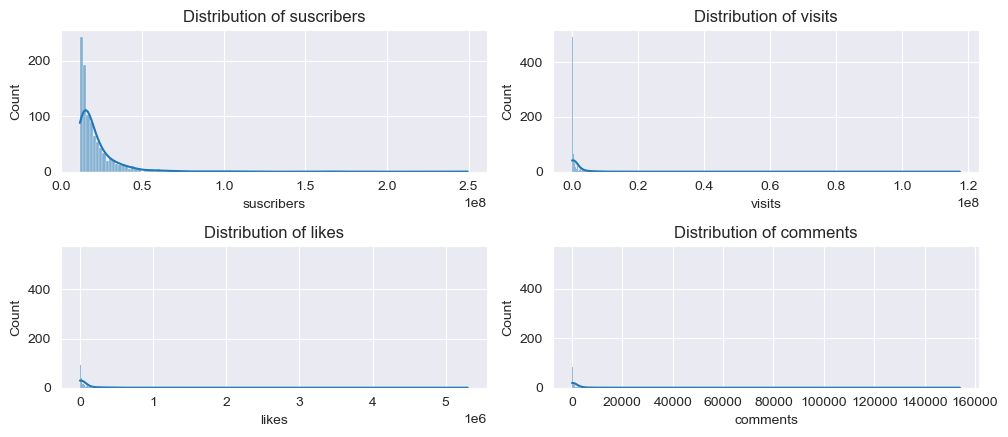

In [14]:
# Set the figure size
plt.figure(figsize=(10,30))

# Loop through the column names and plot distributions
for i, col in enumerate(data_cat.columns):

    # Set subplot
    plt.subplot(14,2,i+1)

    # Seaborn histogram
    sns.histplot(data=data_cat, x=col, kde=True)
    plt.title(f'Distribution of {col}')

# Minimize risk of subplots overlapping
plt.tight_layout()

# Show final plot after subplots finished generating
plt.show()

Clearly, this features are highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary.

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

# Trend Analysis

- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

In [11]:
def value_cnt_norm_cal(df,feature):
    '''
    Function that will return the value count and frequency of each observation within a feature
    '''
    ftr_value_cnt = df[feature].value_counts()
    # normalize the value count
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat.head(20)

In [29]:
def create_bar_plot(df,feature):
    '''
    function to create a bar chart plot
    '''
    match feature:
        case 'categories':
            sns.set_theme(style='ticks')
            sns.barplot(x=value_cnt_norm_cal(df,feature).values[:,0],y= value_cnt_norm_cal(df,feature).index, palette='dark:b_r')
            sns.despine()
            plt.xlabel('count')
            plt.ylabel('')
            plt.title('Popularity of Different Categories among Top YouTube Streamers')
            return plt.show()

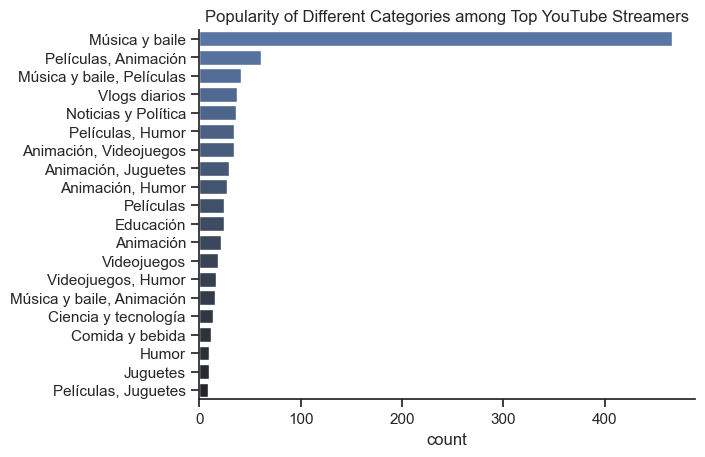

In [30]:
create_bar_plot(data, 'categories')

the category with the most popular is 'Mùsica y baile'

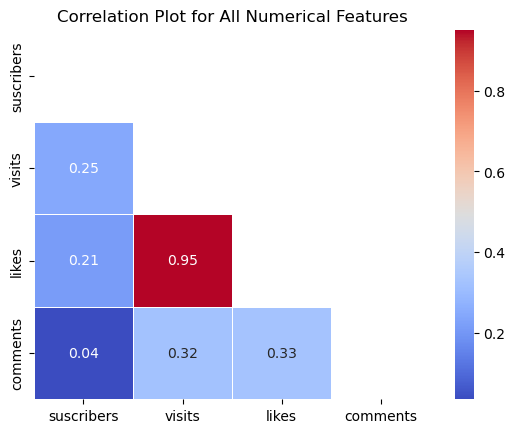

In [16]:
# Investigate correlations between subscribers, likes, visits, and comments
numerical_df = data.select_dtypes(include=['float64'])

correlation_matrix = numerical_df.corr()

lower_triangle = np.tril(correlation_matrix)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=.5)
plt.title('Correlation Plot for All Numerical Features')
plt.show()

- correlation between the number of subscribers and the number of likes: 0.21
- correlation between the number of subscribers and the number of comments: 0.04
- correlation between the number of comments and the number of like: 0.32
- There appear to be high correlation between number of visits and like.

# Audience Study

- Analyze the distribution of streamers audiences by country. Are there regional preferences for specific content categories?

In [27]:
def create_bar_plot(df,feature):
    '''
    function to create a bar chart plot
    '''
    match feature:
        case 'country':
            sns.set_theme(style='ticks')
            sns.barplot(x=value_cnt_norm_cal(df,feature).values[:,0],y= value_cnt_norm_cal(df,feature).index, palette='dark:b_r')
            sns.despine()
            plt.xlabel('count')
            plt.ylabel('')
            plt.title('Distribution of Streamers\' Audiences by Country')
            return plt.show()

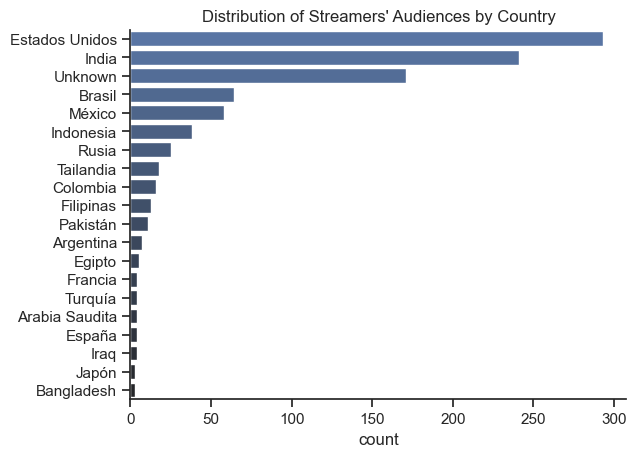

In [28]:
create_bar_plot(data, 'country')

In [22]:
countries_ = data['country'].value_counts().index[:10].tolist().copy()

# filter the df for the top 10 countries
data_country = data[data['country'].isin(countries_)]

# order the countries by average suscribers
country_order = data_country.groupby('country')['suscribers'].mean().sort_values(ascending=False).index

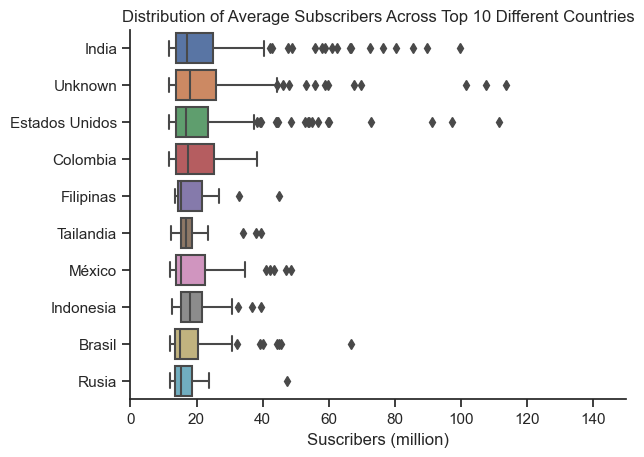

In [24]:
sns.boxplot(data=data_country, x='suscribers', y='country', order=country_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Distribution of Average Subscribers Across Top 10 Different Countries')
plt.xlabel('Suscribers (million)')
plt.ylabel('')
plt.xlim(0, 150000000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000000)}')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [33]:
# Group by country and categories and count the number of occurrences
df_country_count = data.groupby(['country', 'categories']).size()

df_country_count = df_country_count.reset_index(name='category_count')

# Sort the values by category_count in descending order
df_country_count.sort_values(by='category_count', ascending=False, inplace=True)

df_country_count

,country,categories,category_count
86,India,Música y baile,171
62,Estados Unidos,Música y baile,120
170,Unknown,Música y baile,53
17,Brasil,Música y baile,30
162,Unknown,"Animación, Juguetes",28
...,...,...,...
94,India,"Películas, Videojuegos",1
89,India,"Música y baile, Películas",1
88,India,"Música y baile, Humor",1
87,India,"Música y baile, Animación",1


# Performance Metrics

- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [34]:
# Calculate the average number of subscribers, visits, likes, and comments
avg_subscribers = data['suscribers'].mean()
avg_visits = data['visits'].mean()
avg_likes = data['likes'].mean()
avg_comments = data['comments'].mean()

# Print the average metrics
print("Average Subscribers:", avg_subscribers)
print("Average Visits:", avg_visits)
print("Average Likes:", avg_likes)
print("Average Comments:", avg_comments)

Average Subscribers: 21894400.0
Average Visits: 1209446.3155
Average Likes: 53632.592
Average Comments: 1288.768


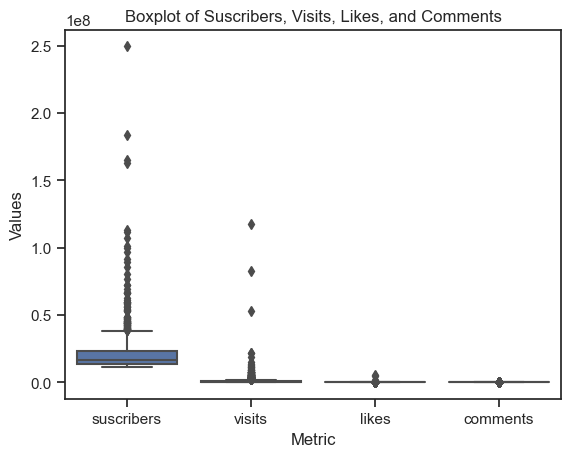

In [35]:
sns.boxplot(data=data[['suscribers', 'visits', 'likes', 'comments']])
plt.title('Boxplot of Suscribers, Visits, Likes, and Comments')
plt.xlabel('Metric')
plt.ylabel('Values')
plt.show()

# Content Categories:

- Explore the distribution of content categories. Which categories have the highest number of streamers?
- Are there specific categories with exceptional performance metrics?

In [36]:
top_20_categories = data.groupby('categories')['username'].count().reset_index()

top_20_categories = top_20_categories.sort_values('username', ascending = False).head(20)

top_20_categories

,categories,username
29,Música y baile,466
36,"Películas, Animación",61
33,"Música y baile, Películas",41
44,Vlogs diarios,37
34,Noticias y Política,36
6,"Animación, Videojuegos",34
37,"Películas, Humor",34
5,"Animación, Juguetes",29
3,"Animación, Humor",27
20,Educación,24


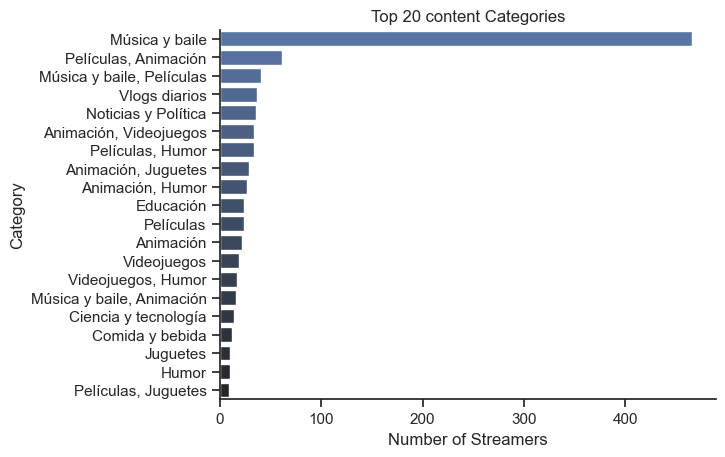

In [37]:
sns.set_theme(style='ticks')
sns.barplot(x='username', y='categories', data=top_20_categories, palette='dark:b_r')
sns.despine()
plt.title('Top 20 content Categories')
plt.xlabel('Number of Streamers')
plt.ylabel('Category')
plt.show()

In [38]:
top_5_categories_sus = data.groupby('categories')['suscribers'].mean().reset_index()
top_5_categories_sus = top_5_categories_sus.sort_values('suscribers', ascending = False).head(5)

top_5_categories_visits = data.groupby('categories')['visits'].mean().reset_index()
top_5_categories_visits = top_5_categories_visits.sort_values('visits', ascending = False).head(5)

top_5_categories_likes = data.groupby('categories')['likes'].mean().reset_index()
top_5_categories_likes = top_5_categories_likes.sort_values('likes', ascending = False).head(5)

top_5_categories_com = data.groupby('categories')['comments'].mean().reset_index()
top_5_categories_com = top_5_categories_com.sort_values('comments', ascending = False).head(5)

print("Top-performing categories by Subscribers:")
print(top_5_categories_sus)

print("\nTop-performing categories by Visits:")
print(top_5_categories_visits)

print("\nTop-performing categories by Likes:")
print(top_5_categories_likes)

print("\nTop-performing categories by Comments:")
print(top_5_categories_com)

Top-performing categories by Subscribers:
                       categories    suscribers
25                       Juguetes  3.788000e+07
39         Películas, Videojuegos  3.325000e+07
5             Animación, Juguetes  2.937586e+07
42             Videojuegos, Humor  2.876471e+07
19  Diseño/arte, DIY y Life Hacks  2.570000e+07

Top-performing categories by Visits:
              categories        visits
42    Videojuegos, Humor  1.023968e+07
3       Animación, Humor  3.760126e+06
44         Vlogs diarios  3.414338e+06
11       Comida y bebida  2.722450e+06
18  Diseño/arte, Belleza  2.700000e+06

Top-performing categories by Likes:
              categories          likes
42    Videojuegos, Humor  420511.764706
44         Vlogs diarios  187244.945946
24                 Humor  169990.000000
18  Diseño/arte, Belleza  152400.000000
3       Animación, Humor  145768.333333

Top-performing categories by Comments:
                categories     comments
3         Animación, Humor  5344.962963
2

# Benchmarking:

- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [39]:
data['above_avg_suscribers'] = np.where(data['suscribers'] > avg_subscribers, 1, 0)
data['above_avg_visits'] = np.where(data['visits'] > avg_visits, 1, 0)
data['above_avg_likes'] = np.where(data['likes'] > avg_likes, 1, 0)
data['above_avg_comments'] = np.where(data['comments'] > avg_comments, 1, 0)

In [40]:
# filter data to show only streamers with above average performance in all four metrics

above_avg_streamers = data[(data['above_avg_suscribers'] == 1) & (data['above_avg_visits']  == 1) & (data['above_avg_likes']  == 1) & (data['above_avg_comments']  == 1)]

above_avg_streamers.head(5)

,rank,username,categories,suscribers,country,visits,likes,comments,links,above_avg_suscribers,above_avg_visits,above_avg_likes,above_avg_comments
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,1,1,1,1
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,1,1,1,1
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...,1,1,1,1
34,35,TaylorSwift,Música y baile,54100000.0,Estados Unidos,4300000.0,300400.0,15000.0,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...,1,1,1,1
39,40,JuegaGerman,"Películas, Animación",48600000.0,México,2000000.0,117100.0,3000.0,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...,1,1,1,1


As we can see, the top-performing content creators are:
- MrBeast
- PewDiePie
- Dude Perfect
- Taylor Swift
- JuegaGerman

# Content Recommendations

- Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
data = pd.read_csv('Task 1 YouTube Streamer Analysis/youtubers_df.csv')
data.columns = data.columns.str.lower()

In [43]:
# Feature engineering: Normalize numerical metrics
scaler = StandardScaler()
numerical_cols = ['suscribers', 'visits', 'likes', 'comments']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [44]:
# Create a content-category matrix (one-hot encoding)
category_matrix = pd.get_dummies(data['categories']).astype(int)

In [45]:
# Calculate similarity between streamers based on categories
category_similarity = cosine_similarity(category_matrix)

In [46]:
category_similarity

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [47]:
# Recommend similar streamers for a given streamer
def recommend_similar_streamers(username, num_recommendations=3):
    idx = data[data['username'] == username].index[0]
    similar_streamers = category_similarity[idx].argsort()[::-1][1:num_recommendations + 1]
    recommended_streamers = data.loc[similar_streamers, 'username']
    return recommended_streamers

In [50]:
# Example usage:
similar_streamers = recommend_similar_streamers('tseries')
print("Recommended streamers for", similar_streamers, ":", {', '.join(similar_streamers)})

Recommended streamers for 224    unknownboyvarun
543       katakit_baby
395             cardib
Name: username, dtype: object : {'unknownboyvarun, katakit_baby, cardib'}


In [48]:
# Identify unique values in 'username' variable
data['username'].unique()

array(['tseries', 'MrBeast', 'CoComelon', 'SETIndia', 'KidsDianaShow',
       'PewDiePie', 'LikeNastyaofficial', 'VladandNiki',
       'zeemusiccompany', 'WWE', 'BLACKPINK', 'GoldminesTelefilms',
       'SonySAB', '5MinuteCraftsYouTube', 'BTS', 'HYBELABELS', 'zeetv',
       'Pinkfong', 'ChuChuTV', 'KondZilla', 'colorstv', 'filmigaane',
       'TSeriesBhaktiSagar', 'tipsofficial', 'MOVIECLIPS',
       'ElReinoInfantil', 'dudeperfect', 'aajtak', 'WaveMusicIndia',
       'SonyMusicIndia', 'marshmello', 'yrf', 'infobellshindirhymes',
       'LooLooKids', 'TaylorSwift', 'EdSheeran', 'BillionSurpriseToys',
       'ArianaGrande', 'shemaroo', 'JuegaGerman', 'BillieEilish',
       'getmovies', 'sonymusicindiaVEVO', 'A4a4a4a4', 'badabunOficial',
       'HarPalGeoOfficial', 'vootkids', 'ARYDigitalasia', 'felipeneto',
       'abscbnentertainment', 'vcsabiavideos', 'BRIGHTSIDEOFFICIAL',
       'KatyPerry', 'Shakira', 'whindersson', 'MashaBearRUSSIAN',
       'Alanwalkermusic', 'MashaBearEN', 'Mikec